## Data Processing For Neural Network Training

In [1]:
import sys
sys.version

'3.10.4 (main, Mar 31 2022, 08:41:55) [GCC 7.5.0]'

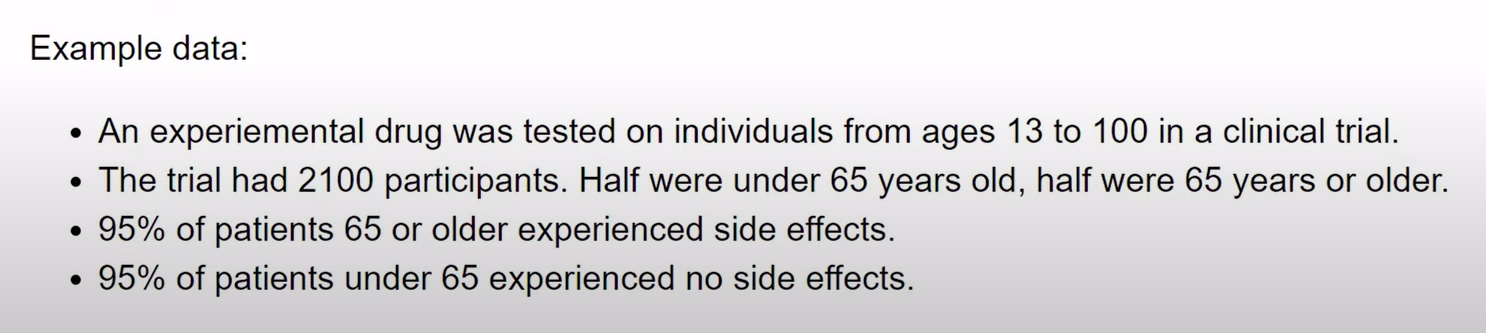

In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_labels = []
train_samples = []

In [4]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
print("Train samples size: ", len(train_samples), type(train_samples))
print("Train lables size: ", len(train_labels), type(train_labels))

Train samples size:  2100 <class 'list'>
Train lables size:  2100 <class 'list'>


In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle (train_labels, train_samples)

In [7]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

### Visualize the preprocessed data

In [8]:
import pandas as pd
train_data = pd.DataFrame (data = scaled_train_samples, columns = ['age'])
train_data['label'] = train_labels
print(train_data)

           age  label
0     0.988506      1
1     0.701149      1
2     0.977011      1
3     0.609195      0
4     0.287356      0
...        ...    ...
2095  0.620690      1
2096  0.747126      1
2097  0.908046      1
2098  0.850575      1
2099  0.655172      1

[2100 rows x 2 columns]


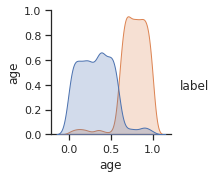

In [9]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(train_data, hue="label")

## Create An Artificial Neural Network With TensorFlow's Keras API

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

2022-04-04 18:34:06.226040: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ohpc/pub/mpi/openmpi3-gnu7/3.1.0/lib:/opt/ohpc/pub/compiler/gcc/7.3.0/lib64:/usr/local/ncarg/lib:/opt/intel/compilers_and_libraries_2020.1.217/linux/compiler/lib/intel64_lin:/opt/intel/compilers_and_libraries_2020.1.217/linux/mpi/intel64/libfabric/lib:/opt/intel/compilers_and_libraries_2020.1.217/linux/mpi/intel64/lib/release:/opt/intel/compilers_and_libraries_2020.1.217/linux/mpi/intel64/lib:/opt/intel/compilers_and_libraries_2020.1.217/linux/ipp/lib/intel64:/opt/intel/compilers_and_libraries_2020.1.217/linux/mkl/lib/intel64_lin:/opt/intel/compilers_and_libraries_2020.1.217/linux/tbb/lib/intel64/gcc4.8:/opt/intel/compilers_and_libraries_2020.1.217/linux/daal/lib/intel64_lin:/opt/intel/debugger_2020/python/intel64/lib:/opt/intel/debugger

In [11]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

2022-04-04 18:34:11.200371: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ohpc/pub/mpi/openmpi3-gnu7/3.1.0/lib:/opt/ohpc/pub/compiler/gcc/7.3.0/lib64:/usr/local/ncarg/lib:/opt/intel/compilers_and_libraries_2020.1.217/linux/compiler/lib/intel64_lin:/opt/intel/compilers_and_libraries_2020.1.217/linux/mpi/intel64/libfabric/lib:/opt/intel/compilers_and_libraries_2020.1.217/linux/mpi/intel64/lib/release:/opt/intel/compilers_and_libraries_2020.1.217/linux/mpi/intel64/lib:/opt/intel/compilers_and_libraries_2020.1.217/linux/ipp/lib/intel64:/opt/intel/compilers_and_libraries_2020.1.217/linux/mkl/lib/intel64_lin:/opt/intel/compilers_and_libraries_2020.1.217/linux/tbb/lib/intel64/gcc4.8:/opt/intel/compilers_and_libraries_2020.1.217/linux/daal/lib/intel64_lin:/opt/intel/debugger_2020/python/intel64/lib:/opt/intel/debugger_2020/libi

In [12]:
type(model), type(scaled_train_samples), scaled_train_samples.shape

pt/intel64/lib:/opt/intel/compilers_and_libraries_2020.1.217/linux/daal/../tbb/lib/intel64_lin/gcc4.4:/opt/intel/compilers_and_libraries_2020.1.217/linux/daal/../tbb/lib/intel64_lin/gcc4.8
2022-04-04 18:34:11.200429: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-04 18:34:11.200492: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ekman): /proc/driver/nvidia/version does not exist
2022-04-04 18:34:11.200882: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(keras.engine.sequential.Sequential, numpy.ndarray, (2100, 1))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## Train An Artificial Neural Network With TensorFlow's Keras API

In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2)

Epoch 1/30
210/210 - 1s - loss: 0.6841 - accuracy: 0.5662 - 1s/epoch - 5ms/step
Epoch 2/30
210/210 - 0s - loss: 0.6641 - accuracy: 0.6610 - 256ms/epoch - 1ms/step
Epoch 3/30
210/210 - 0s - loss: 0.6308 - accuracy: 0.7605 - 230ms/epoch - 1ms/step
Epoch 4/30
210/210 - 0s - loss: 0.5950 - accuracy: 0.8214 - 242ms/epoch - 1ms/step
Epoch 5/30
210/210 - 0s - loss: 0.5607 - accuracy: 0.8457 - 232ms/epoch - 1ms/step
Epoch 6/30
210/210 - 0s - loss: 0.5258 - accuracy: 0.8567 - 253ms/epoch - 1ms/step
Epoch 7/30
210/210 - 0s - loss: 0.4920 - accuracy: 0.8633 - 236ms/epoch - 1ms/step
Epoch 8/30
210/210 - 0s - loss: 0.4600 - accuracy: 0.8695 - 233ms/epoch - 1ms/step
Epoch 9/30
210/210 - 0s - loss: 0.4316 - accuracy: 0.8895 - 245ms/epoch - 1ms/step
Epoch 10/30
210/210 - 0s - loss: 0.4060 - accuracy: 0.8981 - 223ms/epoch - 1ms/step
Epoch 11/30
210/210 - 0s - loss: 0.3835 - accuracy: 0.9033 - 224ms/epoch - 1ms/step
Epoch 12/30
210/210 - 0s - loss: 0.3641 - accuracy: 0.9067 - 223ms/epoch - 1ms/step
Epoc

## Build A Validation Set With TensorFlow's Keras API

In [16]:
# One way to create a validation set is to split it manually.
# valid_set = (x_val, y_val)
# model.fit(x=scaled_train_samples, y=train_labels, validation_data=valid_set, batch_size=10, epochs=30, verbose=2)

In [17]:
# Another way to create a validation set is to use the argument 'validation_split' in the fit() method.
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.2691 - accuracy: 0.9328 - val_loss: 0.2681 - val_accuracy: 0.9286 - 457ms/epoch - 2ms/step
Epoch 2/30
189/189 - 0s - loss: 0.2683 - accuracy: 0.9328 - val_loss: 0.2671 - val_accuracy: 0.9476 - 244ms/epoch - 1ms/step
Epoch 3/30
189/189 - 0s - loss: 0.2673 - accuracy: 0.9386 - val_loss: 0.2663 - val_accuracy: 0.9286 - 273ms/epoch - 1ms/step
Epoch 4/30
189/189 - 0s - loss: 0.2663 - accuracy: 0.9339 - val_loss: 0.2653 - val_accuracy: 0.9476 - 268ms/epoch - 1ms/step
Epoch 5/30
189/189 - 0s - loss: 0.2655 - accuracy: 0.9349 - val_loss: 0.2644 - val_accuracy: 0.9476 - 268ms/epoch - 1ms/step
Epoch 6/30
189/189 - 0s - loss: 0.2647 - accuracy: 0.9392 - val_loss: 0.2636 - val_accuracy: 0.9286 - 261ms/epoch - 1ms/step
Epoch 7/30
189/189 - 0s - loss: 0.2639 - accuracy: 0.9360 - val_loss: 0.2628 - val_accuracy: 0.9286 - 278ms/epoch - 1ms/step
Epoch 8/30
189/189 - 0s - loss: 0.2633 - accuracy: 0.9402 - val_loss: 0.2619 - val_accuracy: 0.9476 - 232ms/epoch - 1ms/step


## Predictions

In [18]:
test_labels = []
test_samples = []

In [19]:
for i in range(10):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [21]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [22]:
# scale the data into -1 to 1
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

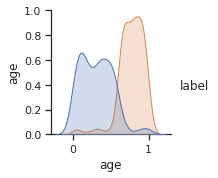

In [24]:
# visualize
import pandas as pd
import seaborn as sns
test_data = pd.DataFrame (data = scaled_test_samples, columns = ['age'])
test_data['label'] = test_labels

sns.set_theme(style="ticks")
sns.pairplot(test_data, hue="label")

In [25]:
predictions = model.predict(x = scaled_test_samples, batch_size=10, verbose=0 )

In [26]:
rounded_predictions = np.argmax(predictions, axis = 1)

In [30]:
print("accuracy = ", 100*np.sum(rounded_predictions == test_labels)/len(rounded_predictions), "%")

accuracy =  94.28571428571429 %


## Confusion Matrix For Neural Network Predictions

In [31]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [32]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [33]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[196  14]
 [ 10 200]]


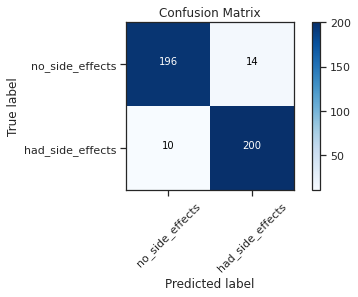

In [35]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Save And Load A Model With TensorFlow's Keras API

In [37]:
import os.path
if os.path.isfile('model/medical_trial_mode.h5') is False:
    model.save('models/medical_trial_model.h5')

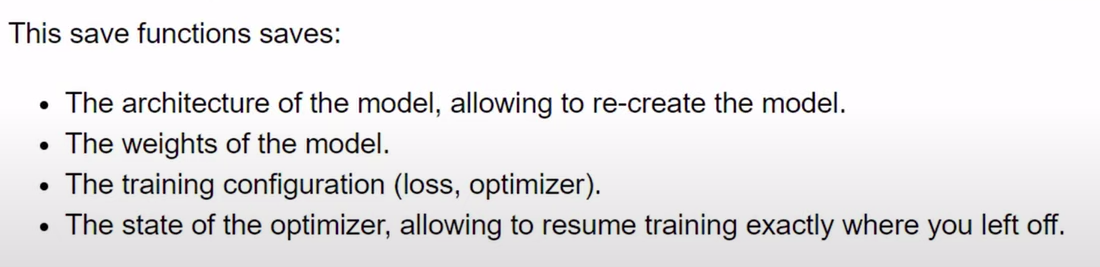

In [38]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [39]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [106]:
# checks if the models have the same weight
nm_wts = new_model.get_weights()
m_wts = model.get_weights()
#m_wts.append(1)
#nm_wts.append(25)
if any(m_wts == nm_wts for m_wts in nm_wts):
    print("The weights are equals")
else:
    print("The weights are different")

The weights are different


/tmp/ipykernel_6287/3082746323.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if any(m_wts == nm_wts for m_wts in nm_wts):
/tmp/ipykernel_6287/3082746323.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if any(m_wts == nm_wts for m_wts in nm_wts):


In [107]:
print(nm_wts)

[array([[ 4.7676280e-01, -2.8775075e-01,  5.8345306e-01,  7.5860518e-01,
        -2.5326848e-02, -4.0684056e-01, -5.1529288e-02,  7.9507917e-01,
        -4.4545239e-01, -5.0698936e-02, -8.1797421e-02,  3.5173807e-01,
        -8.7755680e-02, -7.1669213e-04, -2.0648727e-01, -2.2356182e-01]],
      dtype=float32), array([-0.15235697,  0.        , -0.15857948, -0.2318958 ,  0.        ,
        0.        ,  0.        , -0.20021954,  0.        ,  0.        ,
        0.        ,  0.05179854,  0.        ,  0.23357148,  0.20838812,
        0.        ], dtype=float32), array([[ 5.80393933e-02,  3.97368014e-01,  6.54522419e-01,
        -2.74009734e-01, -2.24631906e-01,  3.88500363e-01,
        -2.34145045e-01, -3.06612283e-01,  2.41482928e-01,
        -4.55501944e-01, -4.77570891e-01,  2.28201821e-01,
        -2.55778104e-01, -3.95633310e-01, -3.58754426e-01,
        -3.01342010e-01,  2.38250300e-01,  3.13412458e-01,
         1.92182839e-01, -3.76666248e-01,  2.87116289e-01,
         5.16505301e-

### Saving as json
This will not save the model weights, configurations, optimizer, loss or anything else. This only saves the architecture of the model.

In [70]:
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [108]:
type(json_string)

str

In [71]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [72]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Saving And Loading The Weights Of The Model

In [ ]:
model.save_weights('models/my_model_weights.h5')

    We can then load the saved weights in to a new model, but the new model will need to have the same architecture as the old model before the weights can be saved.

In [ ]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

model2.load_weights('models/my_model_weights.h5')